In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/SDICA/Proyecto1/dataset/

/content/drive/MyDrive/SDICA/Proyecto1/dataset


In [3]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load data into DataFrame
survivorship = pd.read_csv('titanic.csv', index_col = 0) # Ba dum pssst

In [5]:
# Take a look into the DataFrame's column
survivorship.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
idx,,,,,,,,,,,,,,,
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
# Drop embarked since there's another colum with the same info that's more descriptive
# Drop alive, since we're interested in the survival rate, not their current state
survivorship_lean = survivorship['pclass	sex	age	sibsp	parch	fare	class	who	adult_male	deck	embark_town	alone survived'.split()]

In [7]:
survivorship_lean.head()

,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alone,survived
idx,,,,,,,,,,,,,
0,3,male,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,False,0
1,1,female,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,False,1
2,3,female,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,True,1
3,1,female,35.0,1,0,53.1000,First,woman,False,C,Southampton,False,1
4,3,male,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,True,0


In [8]:
def ratios(dataFrame, column, alive = 1):
    
    # Determine which are the unique values in the column
    unique_values = dataFrame[column].dropna().unique()
    ratio = {}
    
    # For each of the unique values, the value and the ratio in which the passengers survived are going to get added to the ratio dictionary
    for value in unique_values:
                        # When column = value AND passenger survived       Select desired column and count instances    Divide amongst column of interest
        ratio[value] = (dataFrame[(dataFrame[column] == value) & (dataFrame['survived'] == alive)][column].count()/dataFrame[dataFrame[column] == value][column].count())*100
    
    return ratio

In [9]:
print(ratios(survivorship_lean, 'embark_town'))

{'Southampton': 33.69565217391305, 'Cherbourg': 55.35714285714286, 'Queenstown': 38.961038961038966}


In [10]:
survivorship_lean[survivorship_lean['survived'] == 1]['fare'].describe()

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: fare, dtype: float64

In [11]:
survivorship_lean[survivorship_lean['survived'] == 0]['fare'].describe()

count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: fare, dtype: float64

<Axes: title={'center': 'Non-Survivors'}>

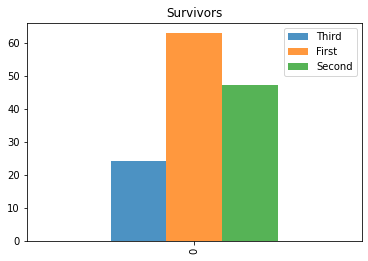

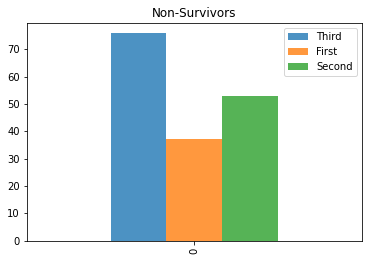

In [12]:
pd.DataFrame(ratios(survivorship_lean, 'class'), index = [0]).plot(kind = 'bar', alpha = 0.8, title = 'Survivors')
pd.DataFrame(ratios(survivorship_lean, 'class', 0), index = [0]).plot(kind = 'bar', alpha = 0.8, title = 'Non-Survivors')

In [13]:
ratios(survivorship_lean, 'who')

{'man': 16.387337057728118,
 'woman': 75.64575645756457,
 'child': 59.036144578313255}

In [14]:
ratios(survivorship_lean, 'who', 0)

{'man': 83.61266294227188,
 'woman': 24.354243542435423,
 'child': 40.963855421686745}

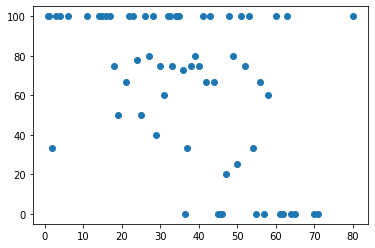

In [15]:
plt.scatter(ratios(survivorship_lean.sort_values(by = 'age').dropna(), 'age').keys(), ratios(survivorship_lean.sort_values(by = 'age').dropna(), 'age').values())

In [16]:
for town in survivorship_lean['embark_town'].dropna().unique():
    print(town, survivorship_lean[(survivorship_lean['survived'] == 0) & (survivorship_lean['embark_town'] == town)]['age'].describe())

Southampton count    353.000000
mean      30.203966
std       13.711031
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: age, dtype: float64
Cherbourg count    51.000000
mean     33.666667
std      14.990553
min       9.000000
25%      23.750000
50%      30.000000
75%      42.500000
max      71.000000
Name: age, dtype: float64
Queenstown count    20.000000
mean     30.325000
std      19.212986
min       2.000000
25%      18.750000
50%      30.750000
75%      40.125000
max      70.500000
Name: age, dtype: float64


In [17]:
for town in survivorship_lean['embark_town'].dropna().unique():
    print(town, survivorship_lean[(survivorship_lean['survived'] == 1) & (survivorship_lean['embark_town'] == town)]['age'].describe())

Southampton count    201.000000
mean      28.113184
std       14.812722
min        0.670000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: age, dtype: float64
Cherbourg count    79.000000
mean     28.973671
std      15.530733
min       0.420000
25%      18.500000
50%      27.000000
75%      39.500000
max      60.000000
Name: age, dtype: float64
Queenstown count     8.000000
mean     22.500000
std       7.191265
min      15.000000
25%      16.000000
50%      20.500000
75%      29.250000
max      33.000000
Name: age, dtype: float64


In [18]:
# Survivorship rule: Para sobrevivir tenía que ser mujer, de primera clase, con edad menor a los 16 años y con algún acompañante en el barco
# Esta regla tiene una tasa de supervivencia del 66%

filtered_passengers = survivorship_lean[
    (survivorship_lean['sex'] == 'female') &
    (survivorship_lean['pclass'] == 1) &
    (survivorship_lean['age'] < 16) &
    ((survivorship_lean['sibsp'] > 0) | (survivorship_lean['parch'] > 0))
]


In [19]:
filtered_passengers

,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alone,survived
idx,,,,,,,,,,,,,
297,1,female,2.0,1,2,151.5500,First,child,False,C,Southampton,False,0
435,1,female,14.0,1,2,120.0000,First,child,False,B,Southampton,False,1
689,1,female,15.0,0,1,211.3375,First,child,False,B,Southampton,False,1
